# Advertising Markets: Decision Making for a Progamming E-Learning Company

The goal of this project is to determine which marketing avenues an e-learning company might find most profitable to use to connect with potential customers for their web and mobile development education app. The offering is a subscription at 59 USD/month.

I will be examining data from the 2017 freeCodeCamp New Coder Survey in lieu of conducting an original survey, in order to save time and money and to make use of the broad existing audience of the freeCodeCamp team.

The freeCodeCamp dataset was generated from a survey to learn more about how people learn to code.  It can be downloaded <a href="https://github.com/freeCodeCamp/2017-new-coder-survey">here</a>.

In [1]:
import pandas as pd
pd.options.display.max_columns = 150
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
survey.shape

(18175, 136)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The most helpful columns for the market analysis are the survey participants' field(s) of interest, the amount of money they have spent on their coding education, and how long they have been practicing coding, to distinguish which survey respondents are the most similar to our target demographic.

In [4]:
#Displaying a relative frequency table of different Job Roles of interest, as indicated by survey respondents
survey['JobRoleInterest'].value_counts(normalize=True) * 100


Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

Based on the above, the various Web Developer roles (Front End, Back End, Full Stack, or some combination) seem to appear the most frequently in the survey responses.  However, it's possible for a respondent to select multiple areas of interest, and we need to account for this to be able to tell the breakdown of career interests with higher accuracy:

In [5]:
#Separate out different Roles of Interest from within the 'JobRoleInterest' column
interests_no_nulls = survey['JobRoleInterest'].dropna()
split_interests = interests_no_nulls.str.split(',')

#Frequency table for the number of Job Role options selected by each respondent
n_of_options = split_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Just under a third (31.65%) of respondents have narrowed it down to one role of interest within the broader spectrum of coding.  Another 25% have 2-3 roles they are considering - which could make sense, considering the existence of the cluster in the three possible answers around the Web Development side of things, for example.

Since our e-learning company's target market is individuals interested primarily in either Web or Mobile development, we need to determine how many survey respondents have indicated a Role Interest in one of these:

In [6]:
#Generating a frequency table for interest in Web/Mobile Dev (True) vs other areas (False)
web_and_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_and_or_mobile.value_counts(normalize=True) * 100
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

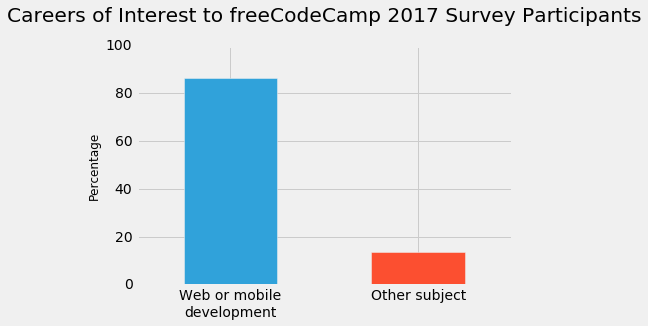

In [23]:
#Creating a plot to visualize the Role Interest categories of survey respondents
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Careers of Interest to freeCodeCamp 2017 Survey Participants', y=1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1], ['Web or mobile\ndevelopment', 'Other subject'], rotation = 0)
plt.ylim([0,100])
plt.show()

Since the e-learning platform is looking to market to potential customers looking to enter careers in web or mobile development, the population responding to this survey is representative of the target population.

Let's go on to determine where survey respondents are located:

In [24]:
#Creating a frequency table of countries of residence of survey respondents
countries_no_nulls = survey['CountryLive'].dropna()
country_freq_table = countries_no_nulls.value_counts() 
country_freq_table

United States of America         5791
India                            1400
United Kingdom                    757
Canada                            616
Brazil                            364
Germany                           324
Poland                            265
Russia                            263
Australia                         259
France                            228
Spain                             217
Nigeria                           214
Ukraine                           202
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Greece                            116
Serbia                            115
Argentina                         113
Pakistan                          109
Kenya                              92
Indonesia                          91
China       

In [25]:
#Creating a relative frequency table of countries of residence of respondents
country_rel_freq = countries_no_nulls.value_counts(normalize=True) * 100
country_rel_freq

United States of America         37.760824
India                             9.128847
United Kingdom                    4.936098
Canada                            4.016693
Brazil                            2.373500
Germany                           2.112676
Poland                            1.727960
Russia                            1.714919
Australia                         1.688837
France                            1.486698
Spain                             1.414971
Nigeria                           1.395409
Ukraine                           1.317162
Romania                           1.115023
Italy                             1.069379
Mexico                            1.010694
Netherlands (Holland, Europe)     0.925926
Philippines                       0.880282
South Africa                      0.821596
Turkey                            0.782473
Greece                            0.756390
Serbia                            0.749870
Argentina                         0.736828
Pakistan   

The two most frequent countries represented in survey responses are USA and India, at 38% and 9% of the total survey responses, respectively.  Advertisements targeted at both these locations may have the best ROI.

The next step is to determine how much money potential customers in these countries are willing to spend on learning to code.

In [26]:
#Changing the respondents who say they have been coding for 0 months to 1 month for math purposes
survey['MonthsProgramming'].replace(0,1, inplace = True)

#Creating a new column to show how much money students have spent per month so far to date:
survey['money_per_month'] = survey['MoneyForLearning'] / survey['MonthsProgramming']
survey['money_per_month'] = survey['money_per_month']
survey['money_per_month'].head(10)



0     25.000000
1     13.333333
2    200.000000
3      0.000000
4      0.000000
5     16.666667
6      0.000000
7      0.000000
8     24.137931
9      5.555556
Name: money_per_month, dtype: float64

In [27]:
#Remove rows where respondent did not supply their country of residence:
survey_good = survey[survey['CountryLive'].notnull()]
survey_good['CountryLive'].value_counts().head(20)

United States of America         5791
India                            1400
United Kingdom                    757
Canada                            616
Brazil                            364
Germany                           324
Poland                            265
Russia                            263
Australia                         259
France                            228
Spain                             217
Nigeria                           214
Ukraine                           202
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Name: CountryLive, dtype: int64

In [28]:
#Determine the mean amount of money spent by students each month
countries_mean = survey_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada', 'Brazil', 'Germany']]

CountryLive
United States of America    206.297711
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Brazil                       56.850199
Germany                      35.331850
Name: money_per_month, dtype: float64

When accounting for the mean amount of money spent per month, potential customers in the USA and Canada seem to outspend those in India, the UK, Brazil, and Germany by a margin of 100%+.  Depending on the distributions of money spent in these countries, however, it's possible that potential customers in each country but Germany may be able to stomach a $60/month fee for access to the e-learning service.

This may be partly biased by the English-language focus of the freeCodeCamp material and audience, but if our platform is English-based as well, then this will be indicative of our audience.

In [35]:
# Create dataframe excluding responses from outside our countries of interest
top_5 = survey_good[survey_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada|Brazil')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


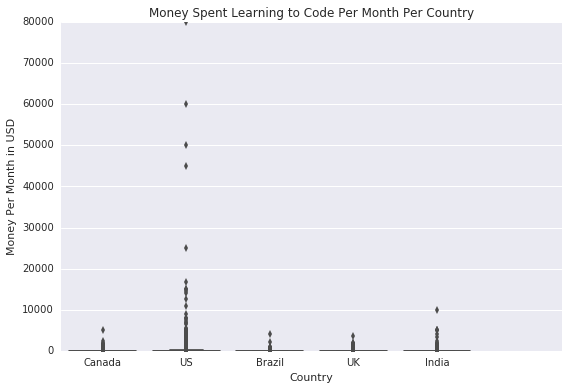

In [43]:
#Visualize the distributions of money per month for top 5 countries of interest
import seaborn as sns
sns.boxplot(y='money_per_month', x='CountryLive', data = top_5)
plt.title('Money Spent Learning to Code Per Month Per Country')
plt.ylabel('Money Per Month in USD')
plt.xlabel('Country')
plt.xticks(range(5), ['Canada', 'US', 'Brazil', 'UK', 'India'])
plt.show()

There are extreme outliers, most apparently in the US, where a handful of values in excess of 20k per month may be skewing the entire data range upwards for that country.  It's not impossible that these few individuals are actually spending this much, but it seems unlikely, even for the priciest of bootcamps.  With the assumption that these values are errors or misreadings of the question, let's deal with them:

In [44]:
#Getting rid of the US's outliers
survey_good = survey_good[survey_good['money_per_month'] < 20000]

In [45]:
#Looking at the means by country again:
countries_mean = survey_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada', 'Brazil']]

CountryLive
United States of America    158.919644
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Brazil                       56.850199
Name: money_per_month, dtype: float64

This operation has reduced the mean spend for Americans by $48/month, and has not affected any other country values.  It still looks like marketing in the US is definitely a good step, and like the second best is Canada, but I want to figure out what proportion of people in each country only take advantage of free resources, to make sure the "freebie" resource users aren't throwing our whole assessment out of whack.

In [73]:
#Printing the ratio surveyed individuals who pay for coding resourcess
countries = ['United States of America', 'India', 'United Kingdom', 'Canada', 'Brazil']
for i in countries:
    freebies = len(survey_good[(survey_good['CountryLive'] == i)
                             &(survey_good['money_per_month']==0)])
    total = len(survey_good[survey_good['CountryLive']==i])
    paid = total - freebies
    ratio = freebies / total * 100
    print(str(i) +":")
    print("Freebies: " + str(freebies))
    print("Ratio: " + str(ratio))
    print("Paid: " + str(paid))
    print("Total: " + str(total))
    print("\n")


United States of America:
Freebies 2328
Ratio: 42.590559824368825
Paid: 3138
Total: 5466


India:
Freebies 695
Ratio: 56.92055692055692
Paid: 526
Total: 1221


United Kingdom:
Freebies 331
Ratio: 47.421203438395416
Paid: 367
Total: 698


Canada:
Freebies 275
Ratio: 47.57785467128028
Paid: 303
Total: 578


Brazil:
Freebies 136
Ratio: 43.17460317460318
Paid: 179
Total: 315




There is about a 15 percentage point difference between the "freebies" in India who do not pay for coding materials (57% - the highest) and the number of people in the US who don't pay (42.5% - the lowest).  This may be explained by socio-economic factors in the two countries on average, i.e. the per capita GDP and average household incomes of the two countries.  The other three countries, Canada, the UK, and Brazil, sit between these values.

The fact that the US has the most freeCodeCamp respondents, spends the most per capita per month on coding resources, and has proportionately the lowest rate of "freebie" code learners all suggest that it should definitely be included as one of the two countries in which to focus marketing efforts.

It's less clear which country should be the second.

Arguments in favour of India:
<ul>
<li>It has the highest population, so more potential customers.</li>
<li>It has the second highest uptake for fCC survey responses, suggesting that they may be plugged into our existing code resource streams.</li>
</ul>

Arguments in favour of Canada:
<ul>
<li>It has a lower "freebie" rate than India by almost 10 percentage points.</li>
<li>On average, people in Canada spend over twice as much per month on coding resources as people in India - meaning that they are more likely to purchase a 59 USD per month coding product.</li>
</ul>

The options moving forward seem to be:

<ol>
<li>Advertise in all three of the US, Canada, and India, or </li>
<li>Advertise in the US and either Canada or India.  </li>
</ol>

It's likely that the US should receive the majority of the marketing budget in any case.  After that, it becomes a question of quantity of potential customers (India) vs higher average spend (Canada).


# Conclusion

The United States should be the primary focus of the marketing budget for the following reasons:
<ul>
<li>Highest mean spend, at almost 160 USD/month.</li>
<li>Lowest "freebie" rate of coders who only use free resources, at 42.5%.</li>
<li>Highest total number of respondents to the fCC survey, at 38% of the total surveyed population.</li>
</ul>

Canada and India are also valid marketing choices, because both are English speaking, have a fairly high rate of survey response, and on average spend at least the 59 USD/month that the e-learning company wants to charge.

Canada's advantages are higher proportion of coding resource fee-payers, and higher average spend.

India's advantage is higher total population to draw potential customers from.